In [18]:
"""
静磁場・静電場における荷電粒子の運動のシミュレーション

ExBドリフト運動及び旋回運動について，xy平面上でプロットしてみる
""";

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate
%matplotlib inline

In [20]:
# 各定数
m = 9.1e-31
e = 1.6e-19

In [21]:
# 今回の条件
E_x = 5
B_z = 1
t = np.linspace(0,2e-10,num=1000) # 計算時間

In [22]:
def f_prime(x,t,M,q,B,E):
    """ dx/dt に当たる関数，ただしx = (x,y,z,vx,vy,vz) """
    x_pos = x[:3]
    x_vel = x[3:]
    F = q * E + q * ( np.cross(x_vel,B)) # 静磁場における電荷の運動の方程式
    ret = np.zeros(6)
    ret[:3] = x_vel
    ret[3:] = F/M
    
    return ret

In [23]:
def simulation(x0,v0,t,M,q,B,E,color,lw=1):
    """ 指定した条件でシミュレーションを行う関数 """
    ret = sp.integrate.odeint(f_prime,np.r_[x0,v0],t,args=(M,q,B,E))

    x = ret[:,0]
    y = ret[:,1]
    
    label = "M = %dm,q = %de" % (int(round(M/m)),int(round(q/e)))
    
    plt.plot(x, y,color=color,label=label,lw=lw)

    ax = plt.axes()
    ax.arrow(x[-1], y[-1], x[-1]-x[-2], y[-1]-y[-2],width=0.3e-11, head_width=3e-11, head_length=0.5e-10, fc=color, ec=color)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

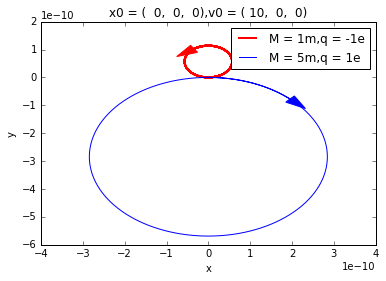

In [24]:
# 初期条件を代入
x0 = [0,0,0]
v0 = [10,0,0]
# 磁場電場を決める
B = np.array([0,0,B_z])
E = np.array([0,0,0])  #旋回運動にする
# シミュレーション・プロット
simulation(x0,v0,t,m,-e,B,E,color='r',lw=2)
simulation(x0,v0,t,5*m,+e,B,E,color='b')
title = "x0 = (%3.0lf,%3.0lf,%3.0lf),v0 = (%3.0lf,%3.0lf,%3.0lf)" % (x0[0],x0[1],x0[2],v0[0],v0[1],v0[2]) 
plt.xlim([-4e-10,4e-10])
plt.ylim([-6e-10,2e-10])
plt.title(title)

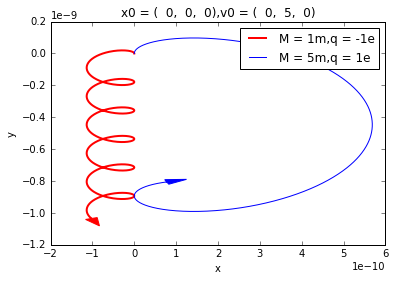

In [25]:
# 初期条件を代入
x0 = [0,0,0]
v0 = [0,E_x/B_z,0]
# 磁場電場を決める
B = np.array([0,0,B_z])
E = np.array([E_x,0,0])
# シミュレーション・プロット
simulation(x0,v0,t,m,-e,B,E,color='r',lw=2)
simulation(x0,v0,t,5*m,+e,B,E,color='b')
title = "x0 = (%3.0lf,%3.0lf,%3.0lf),v0 = (%3.0lf,%3.0lf,%3.0lf)" % (x0[0],x0[1],x0[2],v0[0],v0[1],v0[2]) 
plt.title(title)

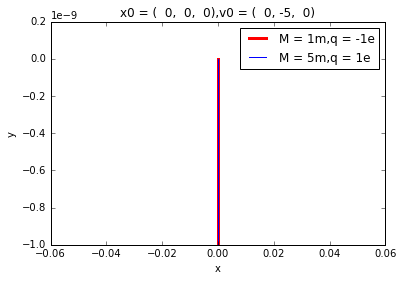

In [26]:
# 初期条件を代入
x0 = [0,0,0]
v0 = [0,-E_x/B_z,0]
# 磁場電場を決める
B = np.array([0,0,B_z])
E = np.array([E_x,0,0])
# シミュレーション・プロット
simulation(x0,v0,t,m,-e,B,E,color='r',lw=3)
simulation(x0,v0,t,5*m,+e,B,E,color='b')
title = "x0 = (%3.0lf,%3.0lf,%3.0lf),v0 = (%3.0lf,%3.0lf,%3.0lf)" % (x0[0],x0[1],x0[2],v0[0],v0[1],v0[2]) 
plt.title(title)